In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Loading the dataset
data = pd.read_csv('Data/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# Checking for missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

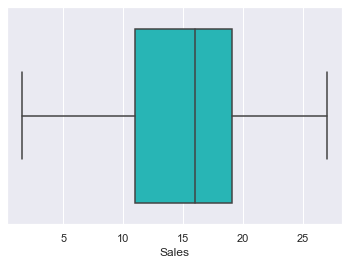

In [4]:
# Checking for Outliers
sns.boxplot(x = data['Sales'], color = '#11cccc')
plt.xlabel('Sales');

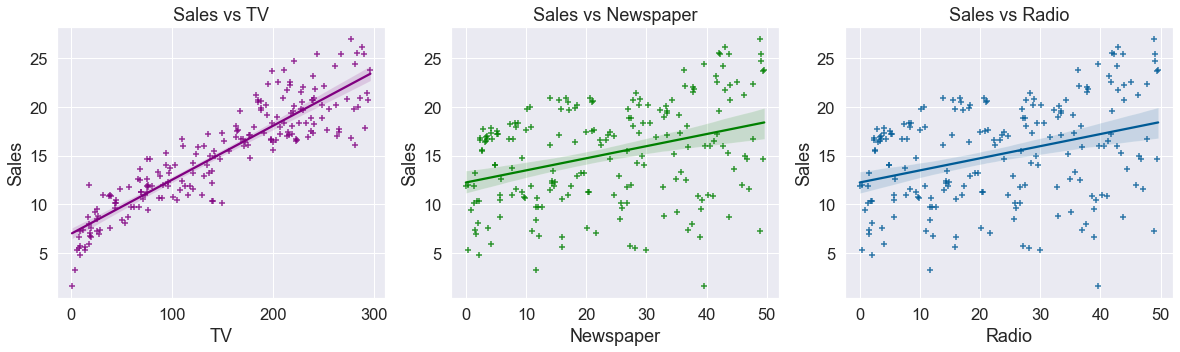

In [5]:
sns.set_context('notebook',font_scale=1.5)

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

sns.regplot(x= data['TV'], y=data['Sales'], color = 'purple', marker = '+', ax = ax[0])
ax[0].set(title = 'Sales vs TV', xlabel = 'TV', ylabel = 'Sales')

sns.regplot(x= data['Radio'], y=data['Sales'],color = 'green', marker = '+', ax = ax[1])
ax[1].set(title = 'Sales vs Newspaper', xlabel = 'Newspaper', ylabel = 'Sales')

sns.regplot(x= data['Radio'], y=data['Sales'],marker= '+' ,color = '#005b96', ax = ax[2])
ax[2].set(title = 'Sales vs Radio', xlabel = 'Radio', ylabel = 'Sales')


plt.show()



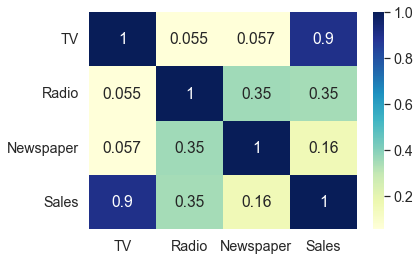

In [6]:
# Checking for correlation
sns.set_context('notebook',font_scale=1.3)
sns.heatmap(data.corr(), cmap= 'YlGnBu', annot = True)
plt.show()

## Regression

In [7]:

X = np.array(data['TV']).reshape(-1,1)
y = np.array(data['Sales'])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [28]:
# Training the model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

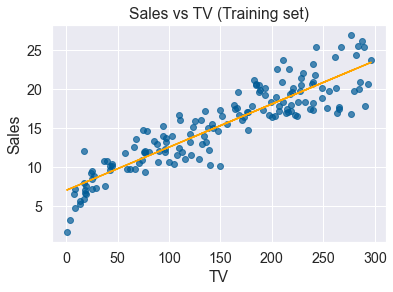

In [30]:
# Visualising training set results
plt.scatter(X_train, y_train, color = '#005b96', alpha= 0.7)
plt.plot(X_train, regressor.predict(X_train), color = "orange")
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs TV (Training set)')
plt.show()

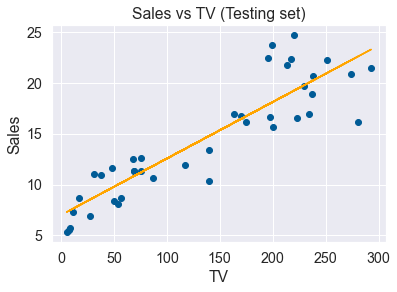

In [31]:
# Visualising test set results
plt.scatter(X_test, y_test, color= '#005b96')
plt.plot(X_test, regressor.predict(X_test), color = "orange")
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs TV (Testing set)')
plt.show()

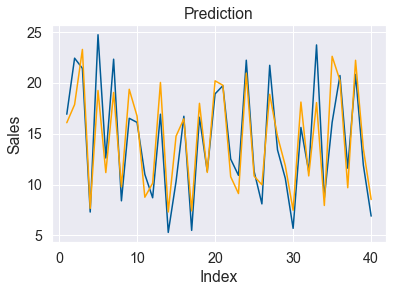

In [32]:
# Plotting predicted value vs Actual value
c = [i for i in range(1, 41, 1)]
plt.plot(c, y_test, color = '#005b96')
plt.plot(c, y_pred, color = 'orange')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

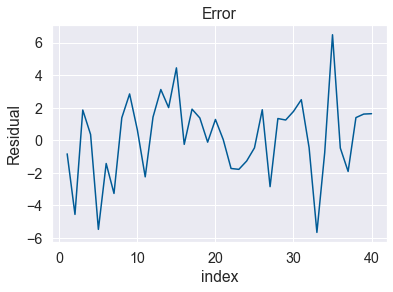

In [33]:
# Plotting the residuals
resid = y_pred - y_test
plt.plot(c, resid, color = '#005b96')
plt.xlabel('index')
plt.ylabel('Residual')
plt.title('Error')
plt.show()

## Model Evaluation

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rsquare = r2_score(y_test, y_pred)

In [35]:
print('Root mean square error:', rmse)
print('R-square:', rsquare)

Root mean square error: 2.470035001123256
R-square: 0.802561303423698


In [39]:
# Intercept and coef of the line
print('Intercept of the model:', round(regressor.intercept_, 2))
print('Coefficient of the line:', round(regressor.coef_[0], 2))

Intercept of the model: 7.01
Coefficient of the line: 0.06


In [40]:
# Thus the equation of the line is Sales = 0.06 * TV + 7.01

# Random Forest

In [42]:

X = data.drop('Sales', axis= 1)
y = np.array(data['Sales'])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [44]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.9513145470549592

In [45]:
y_pred_rf = model_rf.predict(X_test)

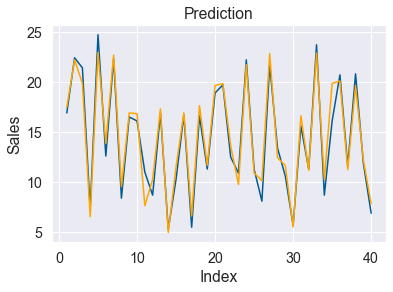

In [47]:
# Plotting predicted value vs Actual value
c = [i for i in range(1, 41, 1)]
plt.plot(c, y_test, color = '#005b96')
plt.plot(c, y_pred_rf, color = 'orange')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

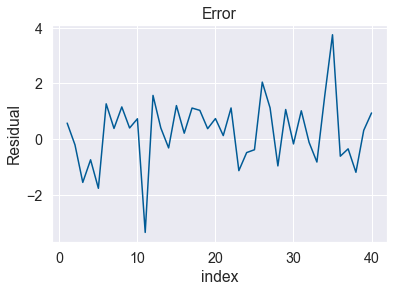

In [48]:
# Plotting the residuals
resid_rf = y_pred_rf - y_test
plt.plot(c, resid_rf, color = '#005b96')
plt.xlabel('index')
plt.ylabel('Residual')
plt.title('Error')
plt.show()

# Model Evaluation

In [49]:
from sklearn.metrics import r2_score, mean_squared_error

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

rsquare_rf = r2_score(y_test, y_pred_rf)

In [50]:
print('Root mean square error:', rmse_rf)
print('R-square:', rsquare_rf)

Root mean square error: 1.2265537289495316
R-square: 0.9513145470549592
